In [41]:
import torch
import numpy as np
from numpy.linalg import norm
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

from random import seed
from random import random

import itertools

In [42]:
np.random.seed(42)

w1 = w11 = np.random.rand()
w3 = -w11
w2 = w12 = np.random.rand()
w4  = -w12
w5 = w21 = np.random.rand()
w7 = -w21
w6 = w22 = np.random.rand()
w8 = -w22

print(np.array([[w1,w2],[w3,w4],[w5,w6],[w7,w8]]))

[[ 0.37454012  0.95071431]
 [-0.37454012 -0.95071431]
 [ 0.73199394  0.59865848]
 [-0.73199394 -0.59865848]]


In [43]:
# This funtion generates data 
np.random.seed(42)
def data_generator(n):
    As = []    
    x = np.random.normal(0,1,size = (2,n)) # n is the size of sample
    noise = np.random.normal(0,0.04**2) 
    
    for condition_number in [1,0.1,0.01,0.0001]: # create a list of As with different conditional number
        A = np.matrix([[1, 1], [1, 1+condition_number]])
        As.append(A)
        
    y1 = np.dot(As[0],x) + 0.01*noise #compute y with different A
    y01 = np.dot(As[1],x) + 0.01*noise
    y001 = np.dot(As[2],x) + 0.01*noise
    y0001 = np.dot(As[3],x) + 0.01*noise
    
    x = torch.Tensor(x).float() #convert all ndarrays to tensors
    y1 = torch.Tensor(y1).float()
    y01 = torch.Tensor(y01).float()
    y001 = torch.Tensor(y001).float()
    y0001 = torch.Tensor(y0001).float()
#     print(x.size())
#     print(y1.size())
    
    return x, y1, y01, y001, y0001    

In [44]:
def Relu(Z):
    return np.maximum(0,Z)

def dRelu(x):
    return np.where(x > 0, 1.0, 0.0)

In [50]:
class net:
    def __init__(self, x, y):
        self.X=x
        self.Y=y
        self.Yh=np.zeros((1,self.Y.shape[1]))
        self.L=2
        self.dims = [2, 4, 2]
        self.param = {}
        self.ch = {} # a cache variable
        self.loss = []
        self.lr=0.003
        self.sam = self.Y.shape[1]
    def nInit(self):    
        np.random.seed(1)
        self.param['W1'] = np.array([[w1,w2],[w3,w4],[w5,w6],[w7,w8]])    
        self.param['W2'] = np.array([[1,-1,0,0],[0,0,1,-1]])             
        return

    def forward(self):    
        Z1 = self.param['W1'].dot(self.X)
        A1 = Relu(Z1)
        self.ch['Z1'],self.ch['A1']=Z1,A1
        
        Z2 = self.param['W2'].dot(A1)
        self.ch['Z2'] = Z2
        self.Yh=Z2
        loss=self.nloss(Z2)
        return self.Yh, loss
    
    def nloss(self,Yh):
        loss = (torch.norm(self.Y-torch.from_numpy(Yh)))**2 * (1./self.sam) #norm
        return loss
    
    def backward(self):
#         first_row = self.Y[0] - torch.from_numpy(self.Yh)[0]
#         second_row = self.Y[1] - torch.from_numpy(self.Yh)[1]        
#         dLoss_Yh = 2*torch.stack((first_row,second_row),0)

        dLoss_Yh = -2*(self.Y - torch.from_numpy(self.Yh))* (1./self.sam)
#         print("dLoss_Yh",dLoss_Yh.shape)
        dLoss_W2 = np.dot(dLoss_Yh,self.ch['A1'].T) 
#         print("dLoss_W2",dLoss_W2.shape)
#         dLoss_W1 = 1./self.X.shape[1] *np.dot(dLoss_A1 = np.dot(np.dot(self.param["W2"].T, dLoss_Yh * dRelu(self.ch['Z1'])),self.X.T))
        dLoss_A1 = np.dot(self.param["W2"].T,dLoss_Yh)
#         print("dLoss_A1",dLoss_A1.shape)
#         print("dRelu(self.ch['Z1']",dRelu(self.ch['Z1']).shape)
        dLoss_Z1 = dLoss_A1 * dRelu(self.ch['Z1'])
#         print("dLoss_Z1",dLoss_Z1.shape)
        dLoss_W1 = np.dot(dLoss_Z1,self.X.T) 
#         print("dLoss_W1",dLoss_W1.shape)
        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2

    def run(self,X, Y, epochs):
        self.loss = []
        np.random.seed(1)                         
        self.nInit()
        for i in range(0, epochs):
            Yh, loss=self.forward()
            self.backward()
            if i % 1 == 0:
#                 print ("Cost after iteration %i: %f",(i, loss))
                self.loss.append(loss)
        print("-"*50)
        print("W1",self.param["W1"],"\n","W2",self.param["W2"])
        print("Y",Y)
        print("Yh",Yh)
#         print(self.param['W1'])
        return self.loss
        

In [51]:
# train_x_all, train_y_1,train_y_01,train_y_001,train_y_0001 = data_generator(10000)
# nn = net(train_x_all,train_y_1)
# list_1 = nn.run(train_x_all,train_y_1,3000)

In [52]:
# n = 1
# epochs = 30
# train_x_all, train_y_1,train_y_01,train_y_001,train_y_0001= data_generator(n) # create the data 
    
# nn = net(train_x_all,train_y_1)
# list_1 = nn.run(train_x_all,train_y_1,epochs)
# # print("list_1",list_1)
# nn = net(train_x_all,train_y_01)
# list_01 = nn.run(train_x_all,train_y_01,epochs)
# # print("list_01",list_01)
# nn = net(train_x_all,train_y_001)
# list_001 = nn.run(train_x_all,train_y_001,epochs)
# nn = net(train_x_all,train_y_0001)
# list_0001 = nn.run(train_x_all,train_y_0001,epochs)     
    
# # plot 3000 epochs and the losses
# # epochs = 3000
# plt.suptitle('Forward Problem')
# plt.plot(range(epochs),list_1)
# plt.plot(range(epochs),list_01)
# # plt.plot(range(epochs),list_001)
# # plt.plot(range(epochs),list_0001)
# x1,x2,y1,y2 = plt.axis()
# plt.axis((x1,x2,0,14))
# plt.xlabel('Number of Epochs')
# plt.ylabel('Mean Squared Error')
# plt.legend(['1', '0.1', '0.01', '0.001'], loc='upper right')
# plt.show()



In [53]:
def main(n,epochs):
    
    train_x_all, train_y_1,train_y_01,train_y_001,train_y_0001= data_generator(n) # create the data 
    nn = net(train_x_all,train_y_1)
    list_1 = nn.run(train_x_all,train_y_1,epochs)
#     print(list_1)
    nn = net(train_x_all,train_y_01)
    list_01 = nn.run(train_x_all,train_y_01,epochs)
#     print(list_01)
    nn = net(train_x_all,train_y_001)
    list_001 = nn.run(train_x_all,train_y_001,epochs)
    nn = net(train_x_all,train_y_0001)
    list_0001 = nn.run(train_x_all,train_y_0001,epochs)     
    
    # plot 3000 epochs and the losses
    epochs = 3000
    plt.suptitle('Forward Problem')
    plt.plot(range(epochs),list_1)
    plt.plot(range(epochs),list_01)
    plt.plot(range(epochs),list_001)
    plt.plot(range(epochs),list_0001)
#     x1,x2,y1,y2 = plt.axis()
#     plt.axis((x1,x2,0,14))
    plt.xlabel('Number of Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend(['1', '0.1', '0.01', '0.0001'], loc='upper right')
    plt.show()

#     plot the first 1000 epochs
    epochs = 1000
    plt.suptitle('Forward Problem')
    plt.plot(range(epochs),list_1[:1000])
    plt.plot(range(epochs),list_01[:1000])
    plt.plot(range(epochs),list_001[:1000])
    plt.plot(range(epochs),list_0001[:1000])
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,0,0.1))
    plt.xlabel('Number of Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend(['1', '0.1', '0.01', '0.0001'], loc='upper right')
    plt.show()

--------------------------------------------------
W1 [[ 0.86638953  0.8150734 ]
 [-0.86626674 -0.81435333]
 [ 0.49479688  1.23848194]
 [-0.49465992 -1.23846466]] 
 W2 [[ 1.11057845 -1.10978542  0.07650138 -0.07780154]
 [ 0.3715346  -0.37204797  1.37037249 -1.37023367]]
Y tensor([[ 1.5018, -0.3836, -0.8805,  ...,  1.3943,  0.8201, -1.5375],
        [ 1.3794, -0.1554, -1.2328,  ...,  3.8027,  1.7028, -1.6371]])
Yh [[ 1.50195265 -0.3834725  -0.88043997 ...  1.39411959  0.82004107
  -1.53726934]
 [ 1.37931485 -0.1554815  -1.23281841 ...  3.80279787  1.70288644
  -1.63719205]]
--------------------------------------------------
W1 [[ 0.79897874  0.78438401]
 [-0.79866112 -0.78398968]
 [ 0.74375144  0.83295271]
 [-0.74376077 -0.83297538]] 
 W2 [[ 1.08452957 -1.08397733  0.17933585 -0.1804167 ]
 [ 0.18189031 -0.18214498  1.14921303 -1.1490629 ]]
Y tensor([[ 1.5018, -0.3836, -0.8805,  ...,  1.3943,  0.8201, -1.5375],
        [ 1.4896, -0.3608, -0.9157,  ...,  1.6351,  0.9083, -1.5475]])
Yh [[ 

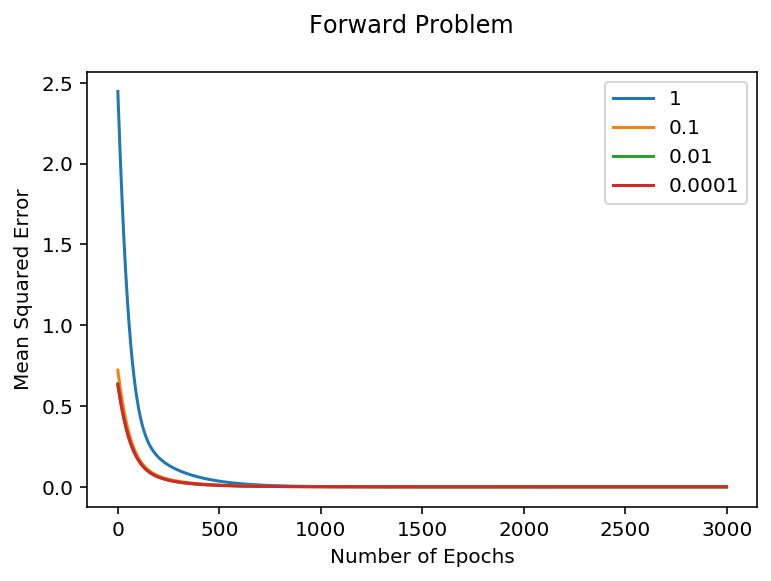

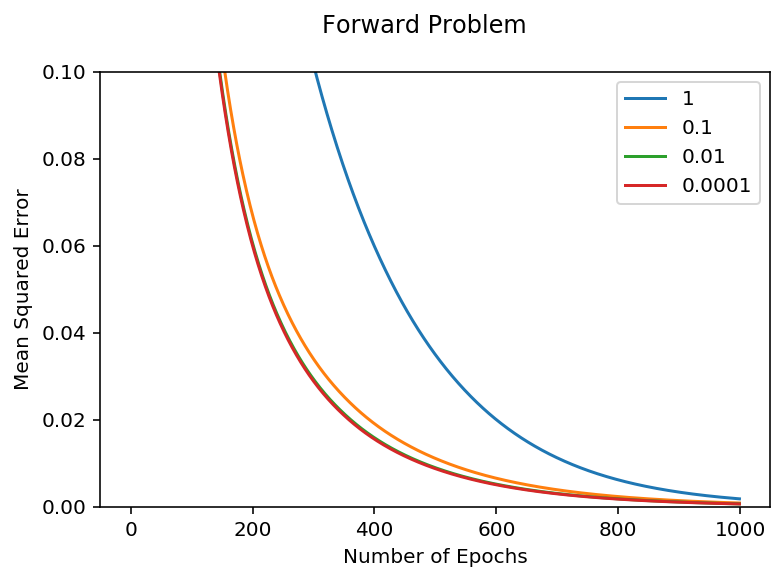

In [54]:
main(10000,3000)